# Import the necessary libraries

In [24]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as zip_ref:  
    zip_ref.extractall('/kaggle/working/dogs-vs-cats/trainData')
from sklearn.model_selection import train_test_split
import pickle

In [2]:
# GLOBAL VARIABLES

CATEGORIES = {"cat": 0,
             "dog": 1}

# not all the images have the same size, so I'll resize them
IMAGE_SIZE = 100

# Load the data

In [25]:
train_data_path = '/kaggle/working/dogs-vs-cats/trainData/train'
initial_data = os.listdir(train_data_path)

In [27]:
initial_data

['dog.7369.jpg',
 'cat.7817.jpg',
 'cat.8172.jpg',
 'cat.9544.jpg',
 'cat.9969.jpg',
 'cat.4421.jpg',
 'cat.2914.jpg',
 'dog.11064.jpg',
 'cat.10312.jpg',
 'cat.8080.jpg',
 'dog.5588.jpg',
 'dog.7761.jpg',
 'dog.9523.jpg',
 'dog.9150.jpg',
 'cat.3952.jpg',
 'dog.10621.jpg',
 'cat.2667.jpg',
 'cat.8848.jpg',
 'dog.7221.jpg',
 'cat.3779.jpg',
 'dog.3312.jpg',
 'cat.10740.jpg',
 'dog.12066.jpg',
 'cat.12015.jpg',
 'cat.10942.jpg',
 'cat.666.jpg',
 'cat.8450.jpg',
 'cat.6117.jpg',
 'dog.6056.jpg',
 'cat.6462.jpg',
 'cat.9830.jpg',
 'cat.9836.jpg',
 'cat.11893.jpg',
 'dog.4909.jpg',
 'dog.3822.jpg',
 'dog.11917.jpg',
 'dog.4297.jpg',
 'cat.7100.jpg',
 'dog.3190.jpg',
 'cat.11453.jpg',
 'dog.4188.jpg',
 'cat.8126.jpg',
 'cat.10643.jpg',
 'cat.4013.jpg',
 'cat.11074.jpg',
 'cat.3774.jpg',
 'dog.7373.jpg',
 'dog.2252.jpg',
 'dog.5059.jpg',
 'cat.7015.jpg',
 'cat.10707.jpg',
 'dog.8761.jpg',
 'dog.11226.jpg',
 'cat.12171.jpg',
 'cat.1664.jpg',
 'cat.7740.jpg',
 'cat.7978.jpg',
 'cat.5493.jpg',


In [ ]:
# I'll use 22 500 images for training the model and the remaining 2500 images for validation

# Data preprocessing

Take each image and convert it into an array of pixels. The variable X will contain the array of pixels for all the images and y will contain the labels: 0 for cat and 1 for dog.

In [38]:
print('Data preprocessing')
print('\nIn progress...')
X = []
y = []

for image in initial_data:
    label = image.split('.')[0]  # either cat or dog
    label = CATEGORIES[label]
    image_path = os.path.join(train_data_path, image)
    image_array = cv2.imread(image_path)
    image_array = cv2.resize(image_array, (IMAGE_SIZE, IMAGE_SIZE))
    X.append(image_array)
    y.append(label)
print('\nCompleted')

Data preprocessing

In progress...

Completed


# Plot some images

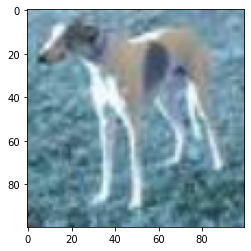

In [13]:
plt.imshow(X[0])

In [14]:
y[0]

1

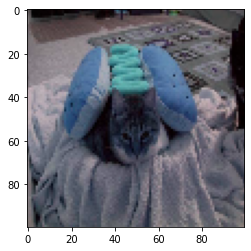

In [16]:
plt.imshow(X[1])

In [17]:
y[1]

0

In [18]:
# convert X and y into arrays
X = np.array(X)
y = np.array(y)

In [19]:
# feature scaling(to run the model faster)
print('\nFeature scaling')
X = X/255
X.shape


Feature scaling


(25000, 100, 100, 3)

In [20]:
# split the data 
print("\n***** Splitting the data set")
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=1)
print("\ntrain data shape: ", train_X.shape)
print("\ntest data shape: ", test_X.shape)


***** Splitting the data set

train data shape:  (22500, 100, 100, 3)

test data shape:  (2500, 100, 100, 3)


In [35]:
cats_train = 0
dogs_train = 0

for i in train_y:
    if(i == 0):
        cats_train+=1
    else:
        dogs_train+=1

print(f'Training images with cats {cats_train}')
print(f'Training images with dogs {dogs_train}')

Training images with cats 11242
Training images with dogs 11258


In [37]:
cats_test = 0
dogs_test = 0

for i in test_y:
    if(i == 0):
        cats_test+=1
    else:
        dogs_test+=1

print(f'Training images with cats {cats_test}')
print(f'Training images with dogs {dogs_test}')

Training images with cats 1258
Training images with dogs 1242


In [ ]:
pickle.dump(train_X, open('train_X.pkl', 'wb'), protocol = 4)
pickle.dump(test_X, open('test_X.pkl', 'wb'))
pickle.dump(train_y, open('train_y.pkl', 'wb'))
pickle.dump(test_y, open('test_y.pkl', 'wb'))